<a href="https://colab.research.google.com/github/giandy/Apps-Android/blob/master/GiandyGarciaMorffi_IAA_PEC1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **PEC1: Recomendadores y agrupación:**

Este archivo de cuaderno interactivo de jupyter le ayudará a comenzar con las operaciones básicas necesarias para resolver los ejercicios del PEC. Utilice este archivo para proporcionar una solución a los ejercicios (tanto el código como los comentarios escritos). Agregue tantas celdas de código y de texto como necesite para resolver todos los ejercicios. Asegúrate de que el archivo se puede ejecutar completamente antes de cargarlo para su entrega.

### Instalar las librerías suprise en google colab:

La biblioteca Surprise* ofrece gran número de funciones y estructuras de datos
adecuadas para la generación de sistemas recomendadores en Python. Además,
permite cargar de forma muy sencilla algunos conjuntos de datos estándar
y también ofrece funciones de evaluación de los resultados.

In [1]:
!pip install scikit-surprise

## **Ejercicio 1: Manipulación de datos con surprise and Pandas:**

Este primer ejercicio es para familiarizarse con el conjunto de datos de Jester y cómo realizar la manipulación básica de datos usando Pandas.


a) Cargar la base de datos Jester desde el surprise dataset

In [2]:
from surprise import Dataset

data = Dataset.load_builtin('jester')

Convertir los datos a un Pandas dataframe

Una de las mejores opciones para trabajar con datos tabulares en Python es usar la Python Data Analysis Library (alias Pandas). La biblioteca Pandas provee estructuras de datos, genera gráficos de alta calidad con matplotlib y se integra de buena forma con otras bibliotecas que usan arrays de NumPy 

In [3]:
import pandas as pd
df = pd.DataFrame(data.__dict__['raw_ratings'], columns=['user_id', 'item_id', 'rating', 'timestamp'])

Realizar inspección y manipulación básica de los datos:

Enumere las 10 primeras entradas del conjunto de datos:


Para esto usaremos pandas.DataFrame.head 

DataFrame.head( n = 10 )
Devuelve las primeras n filas.

Esta función devuelve las primeras n filas del objeto según la posición. Es útil para probar rápidamente si su objeto tiene el tipo correcto de datos. si no se le asigna un valor a n, este tomara el valor n=5 por defecto.

In [4]:
df.head(10) 

,user_id,item_id,rating,timestamp
0,1,5,0.219,None
1,1,7,-9.281,None
2,1,8,-9.281,None
3,1,13,-6.781,None
4,1,15,0.875,None
5,1,16,-9.656,None
6,1,17,-9.031,None
7,1,18,-7.469,None
8,1,19,-8.719,None
9,1,20,-9.156,None


¿Cuántas entradas hay en el conjunto de datos?

La propiedad DataFrame.shape
Devuelve una tupla que representa la dimensionalidad del DataFrame.
Es un atributo de una serie/DataFrame que contiene el número de filas y columnas: (nrows, ncolumns). Aplicado a la columna [0] me devuelve el numero de entradas.

In [5]:
entradas = df.shape[0] # 0: number of rows, 1: number of columns/variables
print('En el conjunto existen', entradas, 'entradas')

En el conjunto existen 1761439 entradas


¿Cuántos usuarios y chistes hay en la base de datos?

La dataframe.nunique()función Pandas devuelve la serie con el número de observaciones distintas sobre el eje solicitado. Si establecemos el valor del eje en 0, entonces encuentra el número total de observaciones únicas sobre el eje del índice. Si establecemos el valor del eje en 1, entonces encontrará el número total de observaciones únicas sobre el eje de la columna. También proporciona la función de excluir los NaNvalores del recuento de números únicos.

In [6]:
print('Number of users:')
num_user = df["user_id"].nunique() # number of users
print('La base de datos cuenta con', num_user, 'usuarios')

Number of users:
La base de datos cuenta con 59132 usuarios


In [7]:
print('Number of items:')
num_item = df["item_id"].nunique() # number of items
print('La base de datos cuenta con', num_item, 'chistes')

Number of items:
La base de datos cuenta con 140 chistes


¿Cuál es la calificación del usuario con user_id = 1 del chiste con item_id = 5?


La propiedad DataFrame.loc
Accede a un grupo de filas y columnas por etiqueta(s) o una matriz booleana.
En este caso me devuelve donde se cumpla la condición.

In [8]:
df.loc[(df["user_id"]=='1') & (df["item_id"]=='5')]

,user_id,item_id,rating,timestamp
0,1,5,0.219,None


El usuario con user_id=1 le ha asignado al chiste con item_id=5 una calificación de 0.219.

Responda las siguientes preguntas:
- ¿Cuál es la valoración media de todos los chistes de la base de datos?

DataFrame.mean

Devuelve la media de los valores sobre el eje solicitado.

In [9]:
media = df['rating'].mean()
print('La valoración media de todos los chistes es', media)


La valoración media de todos los chistes es 1.6186024017864769


- ¿Cuántos chistes ha calificado el usuario con user_id = 10?

In [10]:
pyvalorados = len(df[(df["user_id"]=='10')])
print('El usuario 10 ha calificado',pyvalorados,'chistes')

El usuario 10 ha calificado 104 chistes


Otra forma puede ser: obtengo una lista de item_id donde se cumpla que el user_id=10 y le aplico nunique() para obtener la cantidad de chistes calificados

In [11]:
valorados = df["item_id"].loc[(df["user_id"])=='10'].nunique()
print('El usuario 10 ha calificado',valorados,'chistes')

El usuario 10 ha calificado 104 chistes


Utilice las funciones de Pandas groupby y sort_values para enumerar los
chistes de acuerdo con su clasificación promedio por usuarios. ¿Cuál es el
chiste mejor valorado de la base de datos?

https://pandas.pydata.org/pandasdocs/stable/reference/api/pandas.DataFrame.groupby.html

https://pandas.pydata.org/pandasdocs/stable/reference/api/pandas.DataFrame.sort_values.html

In [12]:
df_grup_sorf = df.groupby(["item_id"],sort=False).mean().sort_values(by=["rating"],ascending=False)
print(df_grup_sorf)

           rating
item_id          
53       3.714381
105      3.711223
89       3.606506
129      3.583496
35       3.560305
...           ...
16      -1.587044
5       -1.756331
7       -1.809230
124     -2.163482
141     -2.749574

[140 rows x 1 columns]


In [13]:
df_grup_sorf.head(1)

,rating
item_id,
53,3.714381


El chiste mejor valorado en la base de datos es el 53.

b) Filtrar el conjunto de datos:

Filtre la base de datos manteniendo solo los elementos que hayan calificado al menos min_item_ratings usuarios y usuarios que hayan calificado al menos los elementos min_user_ratings:

In [14]:
min_item_ratings = 200
filter_items = df['item_id'].value_counts() > min_item_ratings
filter_items = filter_items[filter_items].index.tolist()

min_user_ratings = 130
filter_users = df['user_id'].value_counts() > min_user_ratings
filter_users = filter_users[filter_users].index.tolist()

df_small = df[(df['item_id'].isin(filter_items)) & (df['user_id'].isin(filter_users))]
print('The original data frame shape:\t{}'.format(df.shape))
print('The new data frame shape:\t{}'.format(df_small.shape))

The original data frame shape:	(1761439, 4)
The new data frame shape:	(1325, 4)


Convierta el marco de datos de nuevo a una variable surprise utilizando las funciones reader y load_from_df:

https://surprise.readthedocs.io/en/stable/getting_started.html#use-a-custom-dataset

In [15]:
from surprise import Reader 
reader = Reader(rating_scale=(-10, 10))
data_small = Dataset.load_from_df(df_small[['user_id', 'item_id', 'rating']], reader)

Responde las siguientes preguntas:

- ¿Cuántos usuarios y elementos hay en el conjunto de datos reducido?


In [16]:
print('Numero de usuarios en conjunto reducido:')
user_small = df_small['user_id'].nunique() # number of users
print('El número de usuarios en el conjunto reducido es de', user_small,'usuarios')


Numero de usuarios en conjunto reducido:
El número de usuarios en el conjunto reducido es de 10 usuarios


In [17]:
print('Numero de elementos en conjunto reducido:')
elem_small = df_small['item_id'].nunique() # number de elemens
print('El número de elementos en el conjunto reducido es de', elem_small,'elementos')

Numero de elementos en conjunto reducido:
El número de elementos en el conjunto reducido es de 133 elementos


- Proporcione una breve descripción de las principales características del conjunto de datos.



In [18]:
df_small.describe()

,rating
count,1325.000000
mean,2.346844
std,5.032869
min,-9.844000
25%,-1.438000
50%,3.500000
75%,6.281000
max,9.969000


Si aplicamos la función describe() de la librería pandas podemos ver que el valor mínimo de valoraciones es -9.844 y el máximo 9.969 con un total de 1325 valoraciones, una media de 2.346844, desviaciones de -1.438, 3.5 y 6.281 con una desviación estándar de 5.032869.

c) Proporcione una representación gráfica de la distribución del número de usuarios con un determinado número de valoraciones. ¿Cuáles son las principales conclusiones que se pueden sacar de este gráfico ?


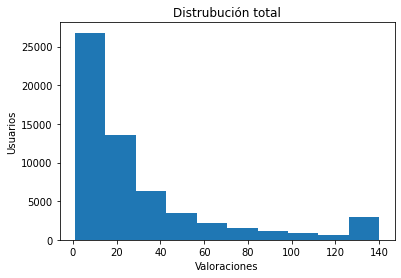

In [19]:
import numpy as np
from matplotlib import pyplot as plt

xy = df['user_id'].value_counts() #Valoraciones por usuarios

plt.xlabel("Valoraciones")
plt.ylabel("Usuarios")
plt.title("Distrubución total")
plt.hist(xy)
plt.show()

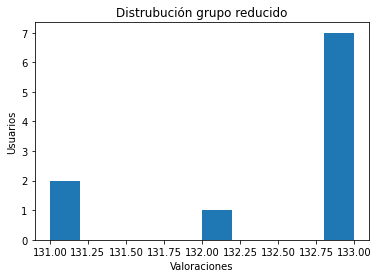

In [20]:
xy_small = df_small['user_id'].value_counts() #Valoraciones por usuarios df reducido

plt.xlabel("Valoraciones")
plt.ylabel("Usuarios")
plt.title("Distrubución grupo reducido")
plt.hist(xy_small)
plt.show()

En Ambas gráficas podemos ver en el eje X (número de valoraciones) y en el eje Y (número de usuarios) que han realizado valoraciones. En el primer gráfico, en base a todos los datos podemos observar aspectos como que la mayoría han hecho entre 0 y 10 valoraciones, como el siguiente grupo de 11 a 20 comienza a reducirse de forma continuada hasta que de 130 a 140 vuelve a subir.

En el grupo reducido es precisamente el grupo de 132.75 a 133 el que más valoraciones realiza con 7 usuarios en total.

## **Ejercicio 2: Diferentes formas de diseñar un sistema de recomendación**
En este ejercicio estamos explorando diferentes formas de diseñar / entrenar un sistema de recomendación. A menos que se indique lo contrario, este ejercicio se realizará con el conjunto de datos reducido obtenido en el ejercicio anterior.



a) Ajuste un recomendador de descomposición de valores singulares utilizando como datos de entrenamiento todo el conjunto de datos reducido. ¿Cuál es la tasa prevista de user_id = 46 del chiste con item_id = 44 ?. ¿Cuál es la discrepancia entre la qualificació prevista y la real? Evalúe el rendimiento de este enfoque utilizando RMSE, MAE y MSE como métricas de precisión.


In [21]:
from surprise import SVD
from surprise import accuracy
from surprise.model_selection import train_test_split

entrenamiento = data_small.build_full_trainset()
metodo = SVD()

usuario = '46'
elemento = '44'

metodo.fit(entrenamiento)
prediccion = metodo.predict(usuario, elemento)
print(prediccion)

print('El valor estimado de el usuario',prediccion.uid, 'con el chiste',prediccion.iid, 'es de', prediccion.est )


user: 46         item: 44         r_ui = None   est = 6.85   {'was_impossible': False}
El valor estimado de el usuario 46 con el chiste 44 es de 6.849049728144569


In [22]:
from surprise.model_selection import cross_validate
result = cross_validate(metodo, data_small, measures=['RMSE', 'MAE', 'MSE'], cv=5, verbose=True)



Evaluating RMSE, MAE, MSE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    4.8414  4.4820  4.0608  4.1766  4.4390  4.4000  0.2713  
MAE (testset)     3.7796  3.4929  3.2830  3.3214  3.4664  3.4687  0.1752  
MSE (testset)     23.4396 20.0881 16.4899 17.4442 19.7050 19.4334 2.4155  
Fit time          0.06    0.06    0.06    0.06    0.07    0.06    0.00    
Test time         0.00    0.00    0.00    0.00    0.00    0.00    0.00    


b) Ajuste el mismo recomendador pero ahora dividiendo los datos en subconjuntos de entrenamiento y prueba en tres proporciones diferentes (entrenamiento / prueba): 90/10, 75/25 y 10/90. Compare el RMSE, MAE y MSE promedio cuando utilice diferentes fracciones para los subconjuntos de entrenamiento y prueba. ¿Qué proporción produce mejores resultados de predicción? Justifica tu respuesta.


In [23]:
from surprise import SVD
from surprise import Dataset
from surprise import accuracy
from surprise.model_selection import train_test_split

print('Caso 90/10: Subconjunto de entrenamiento y prueba (entrenamiento 90%/ prueba 10%):\n') # subconjunto de entrenamiento y prueba (entrenamiento 90%/ prueba 10%)

entrenamiento, testing = train_test_split(data_small, test_size=0.1)

modelo9010 = SVD()
modelo9010.fit(entrenamiento)
prediccion9010 = modelo9010.test(testing)

pred_rmse = accuracy.rmse(prediccion9010)
pred_mae = accuracy.mae(prediccion9010)
pred_mse = accuracy.mse(prediccion9010)

#resultado = pred_rmse/pred_mae
#print('RMSE/MAE', resultado)
print()
print('Caso 75/25: Subconjunto de entrenamiento y prueba (entrenamiento 75%/ prueba 25%):\n') # subconjunto de entrenamiento y prueba (entrenamiento 75%/ prueba 25%)

entrenamiento, testing = train_test_split(data_small, test_size=0.25)

modelo9010 = SVD()
modelo9010.fit(entrenamiento)
prediccion9010 = modelo9010.test(testing)

pred_rmse = accuracy.rmse(prediccion9010)
pred_mae = accuracy.mae(prediccion9010)
pred_mse = accuracy.mse(prediccion9010)

#resultado = pred_rmse/pred_mae
#print('RMSE/MAE', resultado)
print()
print('Caso 10/90: Subconjunto de entrenamiento y prueba (entrenamiento 10%/ prueba 90%):\n') # subconjunto de entrenamiento y prueba (entrenamiento 10%/ prueba 90%)

entrenamiento, testing = train_test_split(data_small, test_size=0.9)

modelo9010 = SVD()
modelo9010.fit(entrenamiento)
prediccion9010 = modelo9010.test(testing)

pred_rmse = accuracy.rmse(prediccion9010)
pred_mae = accuracy.mae(prediccion9010)
pred_mse = accuracy.mse(prediccion9010)

#resultado = pred_rmse/pred_mae
#print('RMSE/MAE', resultado)

Caso 90/10: Subconjunto de entrenamiento y prueba (entrenamiento 90%/ prueba 10%):

RMSE: 3.7434
MAE:  3.0580
MSE: 14.0129

Caso 75/25: Subconjunto de entrenamiento y prueba (entrenamiento 75%/ prueba 25%):

RMSE: 4.2220
MAE:  3.2362
MSE: 17.8255

Caso 10/90: Subconjunto de entrenamiento y prueba (entrenamiento 10%/ prueba 90%):

RMSE: 4.7336
MAE:  3.7816
MSE: 22.4069


Como podemos observar el mejor caso es el caso 90/10.
En este caso se utilizan tres medidas de calidad para evaluar los resultados.  RMSE, MAE y MSE. Lógicamente, en todos los casos se trata de medidas de error, lo que quiere decir que nuestro objetivo será reducirlas al mínimo; un recomendador con menor RMSE/MAE/MSE es mejor que otro con mayores valores de error.

c) Ajuste y evalúe ahora el recomendador de SVD utilizando un procedimiento de validación cruzada de 5 veces (cv = 5). Compare los resultados medios con el rendimiento obtenido en los apartados anteriores. Explique las diferencias de forma razonada.


In [24]:
from surprise.model_selection import cross_validate
from surprise import SVD

recomendador=SVD()

results = cross_validate(recomendador, data_small, measures=['RMSE', 'MAE', 'MSE'], cv=5, verbose=True)

Evaluating RMSE, MAE, MSE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    4.4849  4.4321  4.3547  4.5864  4.5988  4.4914  0.0925  
MAE (testset)     3.6172  3.5042  3.5199  3.6597  3.4985  3.5599  0.0659  
MSE (testset)     20.1145 19.6431 18.9635 21.0349 21.1491 20.1810 0.8298  
Fit time          0.06    0.07    0.06    0.06    0.06    0.06    0.00    
Test time         0.00    0.00    0.00    0.00    0.00    0.00    0.00    


Podemos ver que los resultados tras la validación cruzada de 5 veces presenta una media, tanto para MAE, RMSE y MSE valores muy cercanos a la porción 75/25 del apartado b), resultado obtenido de varias iteraciones

d) Use una validación cruzada de 5 veces para comparar el desempeño de las versiones sesgadas e imparciales del recomendador de SVD descrito en https://surprise.readthedocs.io/en/stable/matrix_factorization.html#surprise.prediction_algorithms.matrix_factorization. SVD. ¿Qué método proporciona una mejor precisión de predicción? ¿Por qué?


In [25]:
from surprise.model_selection import cross_validate
from surprise import SVD

recomendador=SVD(biased = False)

results = cross_validate(recomendador, data_small, measures=['RMSE', 'MAE', 'MSE'], cv=5, verbose=True)

Evaluating RMSE, MAE, MSE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    4.4783  4.7517  4.6018  4.6767  4.7443  4.6506  0.1017  
MAE (testset)     3.7005  3.8229  3.7277  3.8570  3.9716  3.8159  0.0970  
MSE (testset)     20.0553 22.5790 21.1764 21.8714 22.5080 21.6380 0.9397  
Fit time          0.06    0.06    0.06    0.06    0.06    0.06    0.00    
Test time         0.00    0.00    0.00    0.00    0.00    0.00    0.00    


Vemos que es en la sesgada donde el resultado es mejor. Tiene sentido desde la lógica de que la imparcial trabaja con todos los valores, mientras que la sesgada, calcula el promedio de cada sesgo y compensa las situaciones donde hay pocas valoraciones, ganando en velocidad pero restando precisión y dando un resultado resultado más uniforme.

e) Confirme la comparación entre los algoritmos SVD sesgados e insesgados realizando una validación cruzada de búsqueda de cuadrícula https://surprise.readthedocs.io/en/stable/getting_started.html#tune-algorithm-parameters-with-gridsearchcv

In [26]:
from surprise import SVD
from surprise.model_selection import GridSearchCV

#Para el número de iteración del procedimiento SGD, el término de regularización para todos los parámetros y la tasa de aprendizaje para todos los parámetros. 
#Tomaré valores donde incluire los valores por defecto de los ejemplos anteriores.

param_grid = {'n_epochs': [10, 20], 'lr_all': [0.002, 0.005],
              'reg_all': [0.2, 0.4], 'biased': [True, False]}
gs = GridSearchCV(SVD, param_grid, measures=['RMSE', 'MAE', 'MSE'], cv=5)

gs.fit(data_small)

# Mejor puntuación RMSE
print("Mejor puntuación RMSE: ",gs.best_score['rmse'])

# Combinación de parámetros que dan la mejor puntuación RMSE
print("Combinación de parámetros que devuelve la mejor puntuación RMSE: ", gs.best_params['rmse'], '\n')

# Mejor puntuación MAE
print("Mejor puntuación MAE: ",gs.best_score['mae'])

# Combinación de parámetros que dan la mejor puntuación MAE
print("Combinación de parámetros que devuelve la mejor puntuación MAE: ",gs.best_params['mae'], '\n')

# Mejor puntuación MSE
print("Mejor puntuación MSE: ",gs.best_score['mse'])

# Combinación de parámetros que dan la mejor puntuación MSE
print("Combinación de parámetros que devuelve la mejor puntuación MSE: ",gs.best_params['mse'])

Mejor puntuación RMSE:  4.376111529470476
Combinación de parámetros que devuelve la mejor puntuación RMSE:  {'n_epochs': 10, 'lr_all': 0.005, 'reg_all': 0.2, 'biased': True} 

Mejor puntuación MAE:  3.4725471007258775
Combinación de parámetros que devuelve la mejor puntuación MAE:  {'n_epochs': 10, 'lr_all': 0.005, 'reg_all': 0.2, 'biased': True} 

Mejor puntuación MSE:  19.162361712997196
Combinación de parámetros que devuelve la mejor puntuación MSE:  {'n_epochs': 10, 'lr_all': 0.005, 'reg_all': 0.2, 'biased': True}


Observando los resultados de la mejor puntuación de RMSE, MAE y MSE, tenemos unos valores que según la documentación deberían ser más precisos y además, estos tienen "biased" como verdadero. asi que los algoritmos SVD sesgados son mejores segun los resultados obtenidos

## **Ejercicio 3: Comparar algoritmos de agrupamiento con datos sintéticos**
En esta sección, comparará dos de los algoritmos de agrupación en clúster más comunes que utilizan datos generados sintéticamente.



a) Utilice la función make_blobs de la biblioteca sklearn para generar 1500 observaciones bidimensionales distribuidas equitativamente en tres grupos centrados en las posiciones (0,0), (4,4) y (6,6). La descripción de la función se puede encontrar aquí:
https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_blobs.html


In [27]:
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples = 1500,  centers = [(0, 0), (4, 4), (6,6)], random_state=0)
print(X.shape)

(1500, 2)


b) Agrupar los datos usando un algoritmo de k-medias con k = 3 y un método de agrupamiento jerárquico / aglomerativo con tres grupos. Represente gráficamente los resultados con diagramas de dispersión usando diferentes colores para cada uno de los grupos identificados por los dos métodos. Compare los resultados de la agrupación en clústeres. ¿Qué método es mejor cuando el verdadero centroide de los grupos se acerca?


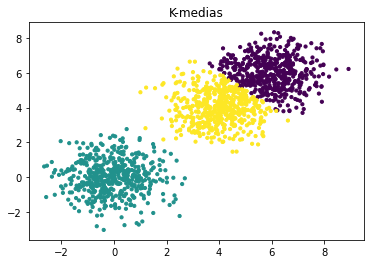

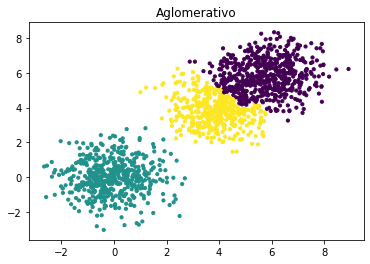

In [28]:
from sklearn.cluster import KMeans, AgglomerativeClustering

y_pred = KMeans(n_clusters=3).fit_predict(X)

plt.scatter(X[:, 0], X[:, 1], s = 10, c = y_pred)
plt.title("K-medias")
plt.show()

y_pred = AgglomerativeClustering(n_clusters=3).fit_predict(X)

plt.scatter(X[:, 0], X[:, 1], s = 10, c = y_pred)
plt.title("Aglomerativo")
plt.show()

Ambos algortimos reconocen del mismo modo el grupo centrado en la posición (0, 0) pero presentan variaciones en el (4, 4) y en el (6, 6). Podemos observar como en el aglomerativo hay menor uniformidad y toma espacio de posiciones que en el K-medias ocupa el (6, 6). Seguramente esto es debido a que k-medias, depende de la distancia de los puntos a los centroides sin tener en cuenta la densidad de los puntos de cada zona, mientras que el algoritmo aglomerativo, parte de una fragmentación completa de los datos y fusiona grupos progresivamente hasta que todos los datos están reunidos en un único grupo.

c) Repita las tareas de las dos secciones anteriores, pero ahora genere las observaciones con las siguientes varianzas desiguales: 1, 2.5 y 0.5 respectivamente. Comente los resultados.

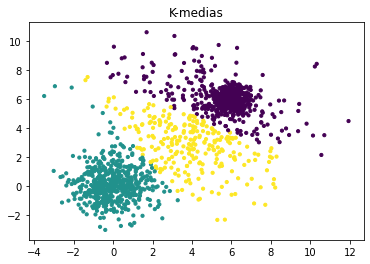

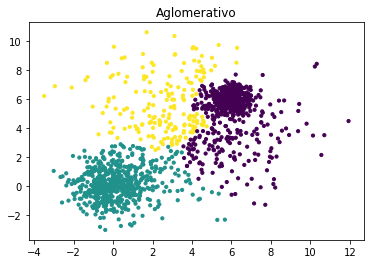

In [29]:
X, y = make_blobs(n_samples = 1500,  centers = [(0, 0), (4, 4), (6,6)], random_state=0, cluster_std=[1, 2.5, 0.5])

y_pred = KMeans(n_clusters=3).fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], s = 10, c = y_pred)
plt.title("K-medias")
plt.show()

y_pred = AgglomerativeClustering(n_clusters=3).fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], s = 10, c = y_pred)
plt.title("Aglomerativo")
plt.show()

En estos casos los resultados presentan un aspecto diferente en relación al apartado b) pero también la diferencia está mas clara entre ambos algoritmos donde la posición (4, 4) se difumina por completo en el aglomerativo y se convierte en una zona donde convergen todos. Esto sucede por el funcionamiento de ambos algoritmos, cuyas diferencias se acentuan al añadir las varianzas desiguales.